In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70 - 90,24 - 32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70 - 90,24 - 32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70 - 90,24 - 32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70 - 90,24 - 32
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70 - 90,24 - 32


In [3]:
df.shape

(8535, 6)

In [4]:
df.isnull().sum()

tanggal                 135
wilayah                 135
waktu                   135
cuaca                   135
kelembaban_persen       135
suhu_derajat_celcius    135
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

tanggal                 0
wilayah                 0
waktu                   0
cuaca                   0
kelembaban_persen       0
suhu_derajat_celcius    0
dtype: int64

In [6]:
df.shape

(8400, 6)

In [7]:
df["cuaca"].unique()

array(['Hujan Lokal', 'Hujan Ringan', 'Berawan', 'Cerah Berawan', 'Cerah',
       'Berawan Tebal', 'Hujan Sedang', 'Cerah Berawn', 'Cerang Berawan',
       'Beawan', 'Berawan ', 'Hujan Petir', 'Hujan Lokal ',
       'Cerah Berawan ', 'Cerah ', 'Cerah Berawah', 'Cerah  ', ' Berawan',
       'Hujan', 'Hujan Petir ', 'Hujan Sedang ', 'Cerah berawan',
       'Hujan Ringanl', 'Berawa', 'Hujang Sedang', 'Hujan Loka',
       'Hujan Ringan '], dtype=object)

In [8]:
import re

def cuaca(x):
  if (re.findall("Cerah", x)):
    return 'Cerah'
  elif (re.findall("Hujan", x)):
    return 'Hujan'
  elif (re.findall("Berawan", x)):
    return 'Berawan'
  else:
    return 'Tidak Teridentifikasi'

df["cuaca"] = df['cuaca'].apply(cuaca)
df["cuaca"].value_counts()

Cerah                    3796
Berawan                  2896
Hujan                    1706
Tidak Teridentifikasi       2
Name: cuaca, dtype: int64

In [9]:
df.waktu.value_counts()

Siang        1758
Pagi         1758
Malam        1758
Dini Hari    1758
siang         342
pagi          342
malam         342
dini hari     342
Name: waktu, dtype: int64

In [10]:
import re

def cuaca(x):
  if (re.findall("dini hari", x)):
    return 'Dini Hari'
  elif (re.findall("siang", x)):
    return 'Siang'
  elif (re.findall("pagi", x)):
    return 'Pagi'
  elif (re.findall("malam", x)):
    return 'Malam'
  else:
    return x

df["waktu"] = df['waktu'].apply(cuaca)
df["waktu"].value_counts()

Siang        2100
Pagi         2100
Malam        2100
Dini Hari    2100
Name: waktu, dtype: int64

In [11]:
df[df["cuaca"] == "Tidak Teridentifikasi"].index

Int64Index([358, 7011], dtype='int64')

In [12]:
df.drop(df[df["cuaca"] == "Tidak Teridentifikasi"].index, inplace=True)
df["cuaca"].unique()

array(['Hujan', 'Berawan', 'Cerah'], dtype=object)

In [13]:
df["kelembapan_min"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[0])
df["kelembapan_min"] = [x.strip(' ') for x in df["kelembapan_min"]]

df["kelembapan_max"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[1])
df["kelembapan_max"] = [x.strip(' ') for x in df["kelembapan_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90


In [14]:
df["suhu_min"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[0])
df["suhu_min"] = [x.strip(' ') for x in df["suhu_min"]]

df["suhu_max"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[1])
df["suhu_max"] = [x.strip(' ') for x in df["suhu_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32


In [15]:
df['suhu_min'].value_counts()

24    4102
23    3072
25     576
22     552
21      48
20      24
26      24
Name: suhu_min, dtype: int64

In [16]:
df['suhu_max'].value_counts()

33    3431
32    1991
34    1440
31     696
30     360
35     288
29     120
28      72
Name: suhu_max, dtype: int64

In [17]:
print('Kelembapan Min\n', df['kelembapan_min'].value_counts(), '\n\n')
print('Kelembapan Min\n', df['kelembapan_max'].value_counts(), '\n')

Kelembapan Min
 70    1727
55    1296
65    1272
60    1224
75     839
45     624
50     600
80     480
40     192
35      96
85      48
Name: kelembapan_min, dtype: int64 


Kelembapan Min
 95     3264
90     2375
85     1128
100    1031
80      504
75       96
Name: kelembapan_max, dtype: int64 



In [18]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32


In [19]:
df.drop(columns=["kelembaban_persen", "suhu_derajat_celcius", "tanggal"], inplace=True)

In [20]:
df.wilayah.value_counts()

Jakarta Utara       1400
Jakarta Timur       1400
Jakarta Selatan     1400
Jakarta Pusat       1400
Kepulauan Seribu    1399
Jakarta Barat       1399
Name: wilayah, dtype: int64

In [21]:
df.dtypes

wilayah           object
waktu             object
cuaca             object
kelembapan_min    object
kelembapan_max    object
suhu_min          object
suhu_max          object
dtype: object

In [22]:
df["kelembapan_min"] = df.kelembapan_min.astype(int)
df["kelembapan_max"] = df.kelembapan_max.astype(int)
df["suhu_min"] = df.suhu_min.astype(int)
df["suhu_max"] = df.suhu_max.astype(int)
df.dtypes

wilayah           object
waktu             object
cuaca             object
kelembapan_min     int32
kelembapan_max     int32
suhu_min           int32
suhu_max           int32
dtype: object

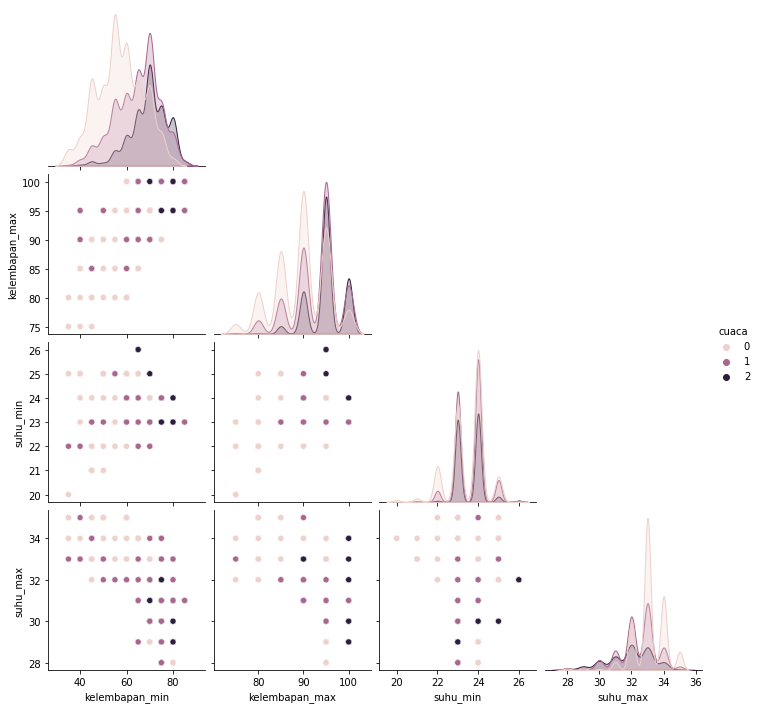

In [24]:
sns.pairplot(df, hue="cuaca", corner=True)

In [25]:
df.head()

,wilayah,waktu,cuaca,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,2,70,90,24,32
1,Kepulauan Seribu,Pagi,2,70,90,24,32
2,Kepulauan Seribu,Malam,2,70,90,24,32
3,Kepulauan Seribu,Dini Hari,2,70,90,24,32
4,Jakarta Utara,Siang,2,70,90,24,32


Text(0.5, 1.0, 'suhu_max')

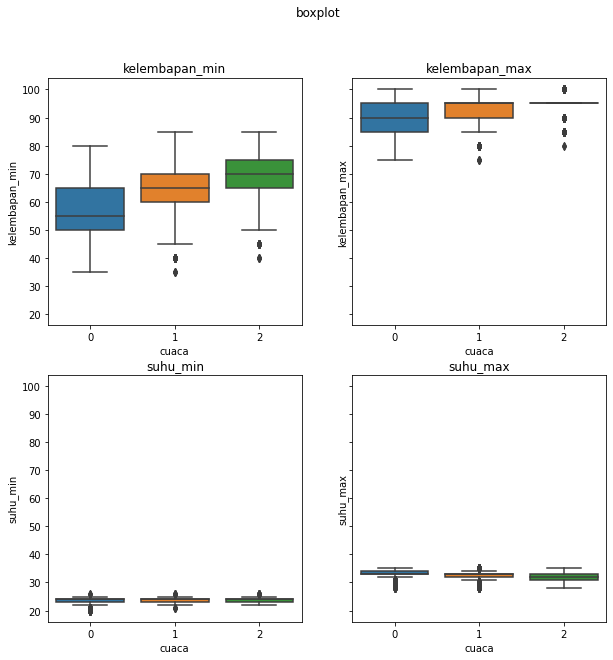

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
fig.suptitle("boxplot")

# Kelembapan min
sns.boxplot(x="cuaca", y="kelembapan_min", data=df, ax=axes[0, 0]).set_title("kelembapan_min")

# Kelembapan max
sns.boxplot(x="cuaca", y="kelembapan_max", data=df, ax=axes[0, 1]).set_title("kelembapan_max")

# suhu min
sns.boxplot(x="cuaca", y="suhu_min", data=df, ax=axes[1, 0]).set_title("suhu_min")

# suhu max
sns.boxplot(x="cuaca", y="suhu_max", data=df, ax=axes[1, 1]).set_title("suhu_max")

In [27]:
df.shape

(8398, 7)

In [28]:
numeric = ["kelembapan_min", "kelembapan_max", "suhu_min", "suhu_max"]

from scipy import stats
df2 = (df[(np.abs(stats.zscore(df[numeric])) < 3).all(axis=1)])
df2.shape

(8158, 7)

Text(0.5, 1.0, 'suhu_max')

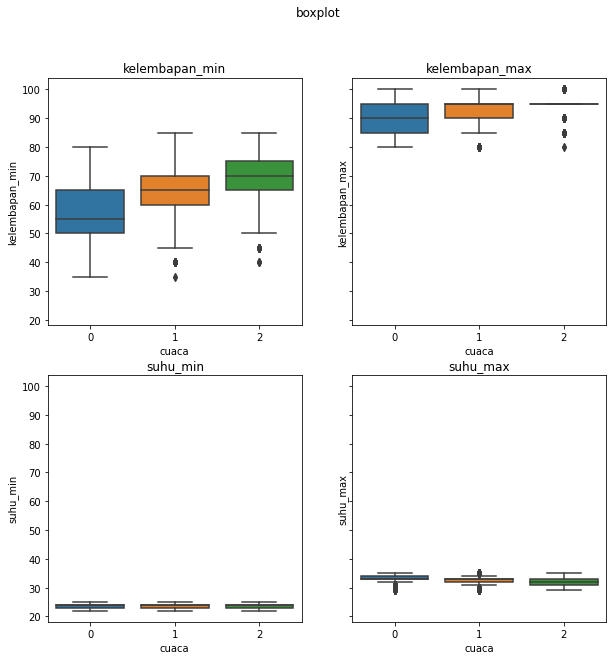

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
fig.suptitle("boxplot")

# Kelembapan min
sns.boxplot(x="cuaca", y="kelembapan_min", data=df2, ax=axes[0, 0]).set_title("kelembapan_min")

# Kelembapan max
sns.boxplot(x="cuaca", y="kelembapan_max", data=df2, ax=axes[0, 1]).set_title("kelembapan_max")

# suhu min
sns.boxplot(x="cuaca", y="suhu_min", data=df2, ax=axes[1, 0]).set_title("suhu_min")

# suhu max
sns.boxplot(x="cuaca", y="suhu_max", data=df2, ax=axes[1, 1]).set_title("suhu_max")

In [30]:
df.head()

,wilayah,waktu,cuaca,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,2,70,90,24,32
1,Kepulauan Seribu,Pagi,2,70,90,24,32
2,Kepulauan Seribu,Malam,2,70,90,24,32
3,Kepulauan Seribu,Dini Hari,2,70,90,24,32
4,Jakarta Utara,Siang,2,70,90,24,32


In [31]:
X = df.drop(columns=["cuaca"])
y = df["cuaca"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6718, 6), (1680, 6), (6718,), (1680,))

In [32]:
X_train.head()

,wilayah,waktu,kelembapan_min,kelembapan_max,suhu_min,suhu_max
1768,Jakarta Pusat,Siang,60,90,24,34
6034,Jakarta Timur,Malam,75,95,24,34
2491,Jakarta Pusat,Dini Hari,40,85,24,34
6349,Jakarta Selatan,Pagi,70,95,23,33
3486,Jakarta Utara,Malam,45,75,22,32


In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

numeric = ["kelembapan_min", "kelembapan_max", "suhu_min", "suhu_max"]
cat = ["wilayah", "waktu"]

X_train_poly = poly.fit_transform(X_train[numeric])
X_test_poly = poly.fit_transform(X_test[numeric])


X_train[poly.get_feature_names(numeric)] = poly.fit_transform(X_train[numeric])
X_test[poly.get_feature_names(numeric)] = poly.fit_transform(X_test[numeric])

D:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated, get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated, get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
X_train.head()

,wilayah,waktu,kelembapan_min,kelembapan_max,suhu_min,suhu_max,1,kelembapan_min^2,kelembapan_min kelembapan_max,kelembapan_min suhu_min,kelembapan_min suhu_max,kelembapan_max^2,kelembapan_max suhu_min,kelembapan_max suhu_max,suhu_min^2,suhu_min suhu_max,suhu_max^2
1768,Jakarta Pusat,Siang,60.0,90.0,24.0,34.0,1.0,3600.0,5400.0,1440.0,2040.0,8100.0,2160.0,3060.0,576.0,816.0,1156.0
6034,Jakarta Timur,Malam,75.0,95.0,24.0,34.0,1.0,5625.0,7125.0,1800.0,2550.0,9025.0,2280.0,3230.0,576.0,816.0,1156.0
2491,Jakarta Pusat,Dini Hari,40.0,85.0,24.0,34.0,1.0,1600.0,3400.0,960.0,1360.0,7225.0,2040.0,2890.0,576.0,816.0,1156.0
6349,Jakarta Selatan,Pagi,70.0,95.0,23.0,33.0,1.0,4900.0,6650.0,1610.0,2310.0,9025.0,2185.0,3135.0,529.0,759.0,1089.0
3486,Jakarta Utara,Malam,45.0,75.0,22.0,32.0,1.0,2025.0,3375.0,990.0,1440.0,5625.0,1650.0,2400.0,484.0,704.0,1024.0


In [35]:
X_train = pd.get_dummies(X_train, columns=["waktu", "wilayah"])
X_test = pd.get_dummies(X_test, columns=["waktu", "wilayah"])

In [36]:
X_test.head()

,kelembapan_min,kelembapan_max,suhu_min,suhu_max,1,kelembapan_min^2,kelembapan_min kelembapan_max,kelembapan_min suhu_min,kelembapan_min suhu_max,kelembapan_max^2,...,waktu_Dini Hari,waktu_Malam,waktu_Pagi,waktu_Siang,wilayah_Jakarta Barat,wilayah_Jakarta Pusat,wilayah_Jakarta Selatan,wilayah_Jakarta Timur,wilayah_Jakarta Utara,wilayah_Kepulauan Seribu
7548,70.0,90.0,24.0,31.0,1.0,4900.0,6300.0,1680.0,2170.0,8100.0,...,0,0,0,1,0,0,1,0,0,0
2230,45.0,90.0,24.0,34.0,1.0,2025.0,4050.0,1080.0,1530.0,8100.0,...,0,1,0,0,1,0,0,0,0,0
3589,55.0,85.0,23.0,33.0,1.0,3025.0,4675.0,1265.0,1815.0,7225.0,...,0,0,1,0,0,0,1,0,0,0
2520,50.0,90.0,23.0,34.0,1.0,2500.0,4500.0,1150.0,1700.0,8100.0,...,0,0,0,1,0,0,0,0,0,1
5419,55.0,90.0,24.0,33.0,1.0,3025.0,4950.0,1320.0,1815.0,8100.0,...,1,0,0,0,0,1,0,0,0,0


In [37]:
from jcopml.tuning.space import Integer, Real

parameters = {
    'max_depth': Integer(low=1, high=10),
    'learning_rate': Real(low=-2, high=0, prior='log-uniform'),
    'n_estimators': Integer(low=100, high=200),
    'subsample': Real(low=0.3, high=0.8, prior='uniform'),
    'gamma': Integer(low=1, high=10),
    'colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
    'reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
    'reg_lambda': Real(low=-3, high=1, prior='log-uniform')
}

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

XGB = XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False)

model = RandomizedSearchCV(XGB, parameters, cv=3, n_iter=500, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

D:\python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


D:\python\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.8755218134086108, 'gamma': 1, 'learning_rate': 0.011526987139296145, 'max_depth': 9, 'n_estimators': 192, 'reg_alpha': 0.0037040921870208836, 'reg_lambda': 0.007137948199034479, 'subsample': 0.6325730971192027}
[[610 108  42]
 [141 365  73]
 [ 46  92 203]] 

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      3036
           1       0.71      0.69      0.70      2317
           2       0.77      0.71      0.74      1365

    accuracy                           0.76      6718
   macro avg       0.76      0.75      0.75      6718
weighted avg       0.76      0.76      0.76      6718
 

              precision 